# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [108]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [109]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [111]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

# 2 - Realize a segunda etapa de pré processamento dos dados.

## A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

In [112]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


## B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

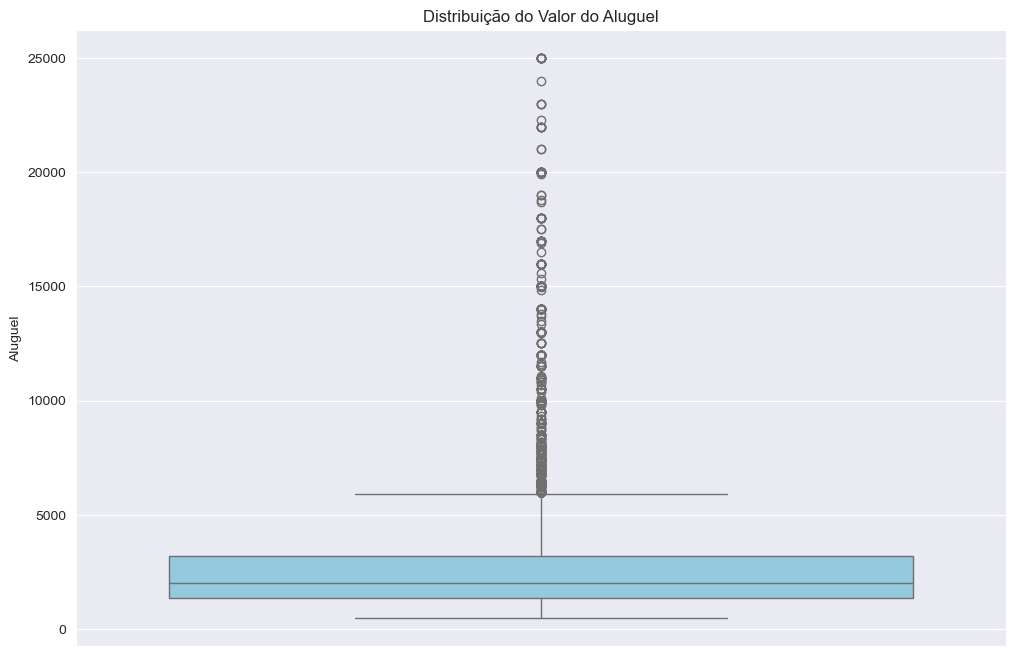

In [113]:
sns.set_style('darkgrid')

#boxplot da coluna Valor_Aluguel
plt.figure(figsize=(12,8))
sns.boxplot(df,y='Valor_Aluguel', color='skyblue')
plt.title('Distribuição do Valor do Aluguel')
plt.ylabel('Aluguel')
plt.show()

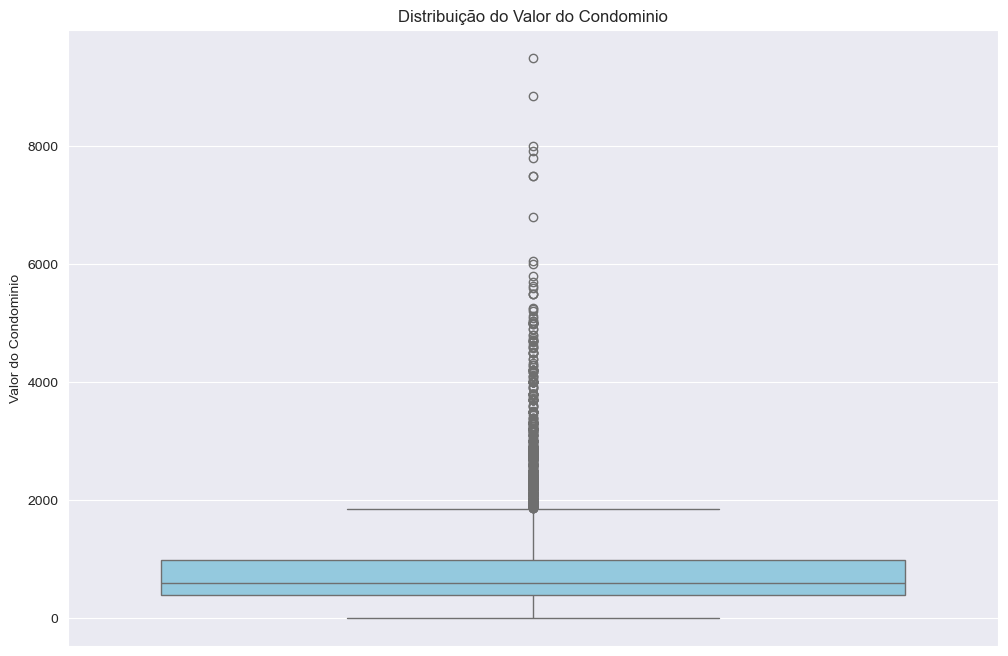

In [114]:
sns.set_style('darkgrid')

#boxplot da coluna Valor_Condominio
plt.figure(figsize=(12,8))
sns.boxplot(df,y='Valor_Condominio', color='skyblue')
plt.title('Distribuição do Valor do Condominio')
plt.ylabel('Valor do Condominio')
plt.show()

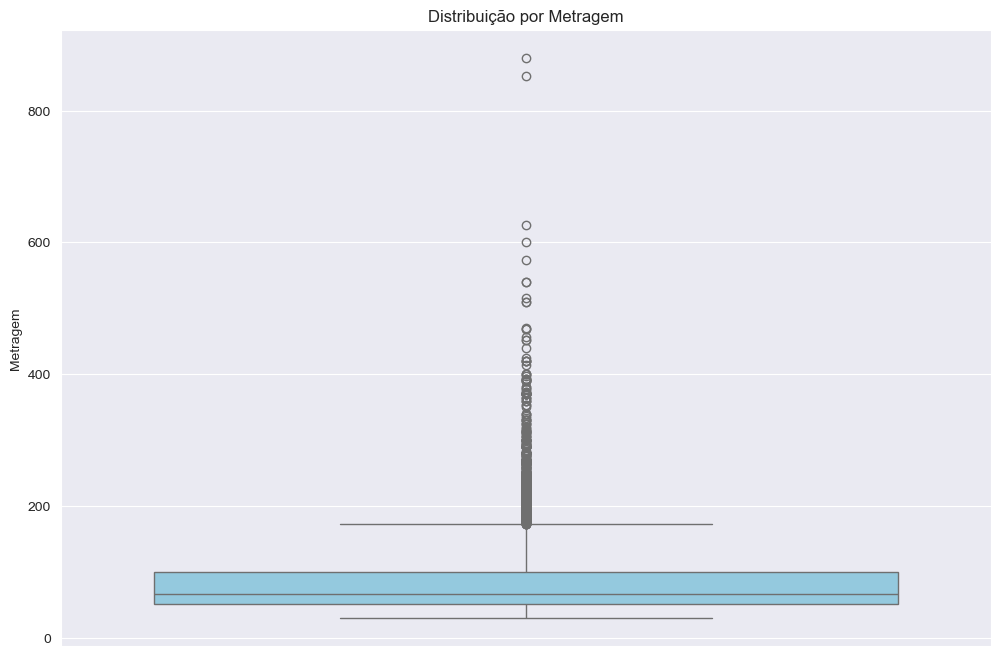

In [115]:
sns.set_style('darkgrid')

#boxplot da coluna Metragem
plt.figure(figsize=(12,8))
sns.boxplot(df,y='Metragem', color='skyblue')
plt.title('Distribuição por Metragem')
plt.ylabel('Metragem')
plt.show()

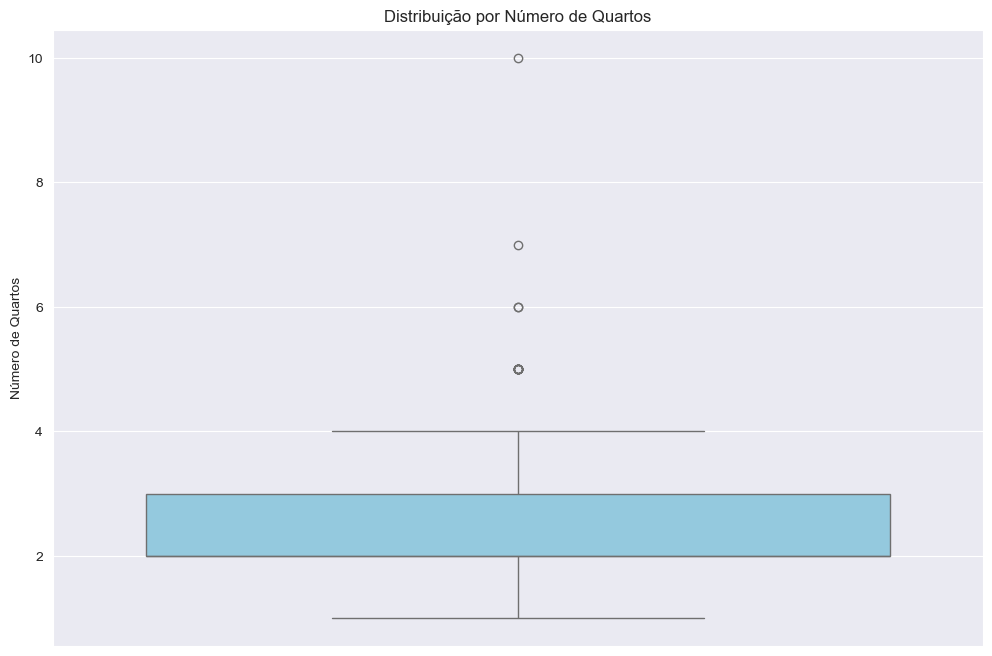

In [116]:
sns.set_style('darkgrid')

#boxplot da coluna N_Quartos
plt.figure(figsize=(12,8))
sns.boxplot(df,y='N_Quartos', color='skyblue')
plt.title('Distribuição por Número de Quartos')
plt.ylabel('Número de Quartos')
plt.show()

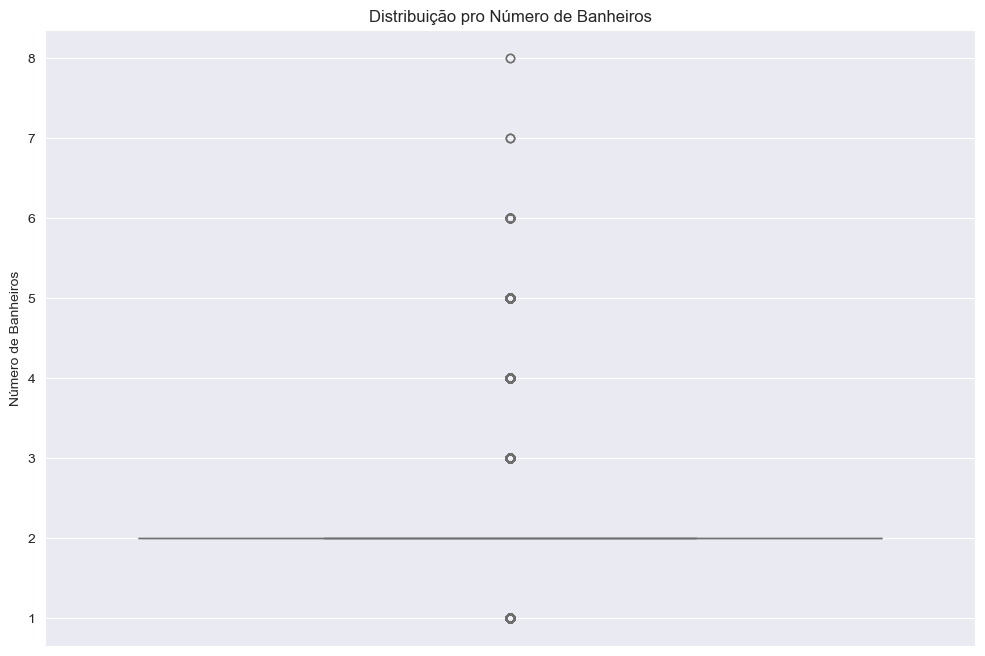

In [117]:
sns.set_style('darkgrid')

#boxplot para a coluna N_banheiros
plt.figure(figsize=(12,8))
sns.boxplot(df,y='N_banheiros', color='skyblue')
plt.title('Distribuição pro Número de Banheiros')
plt.ylabel('Número de Banheiros')
plt.show()

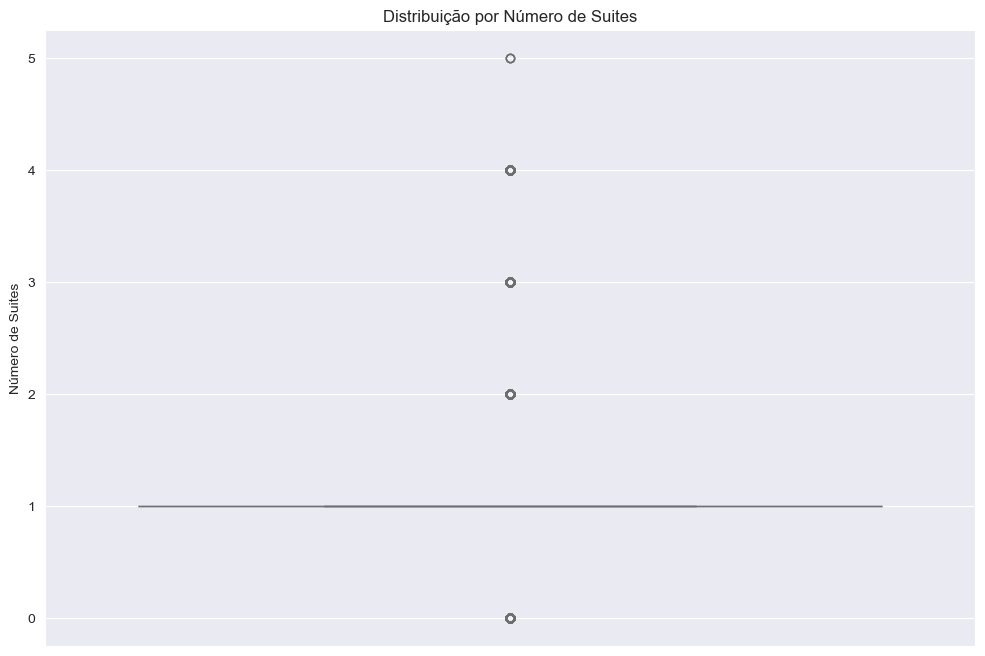

In [118]:
sns.set_style('darkgrid')

#boxplot para a coluna N_Suites
plt.figure(figsize=(12,8))
sns.boxplot(df,y='N_Suites', color='skyblue')
plt.title('Distribuição por Número de Suites')
plt.ylabel('Número de Suites')
plt.show()

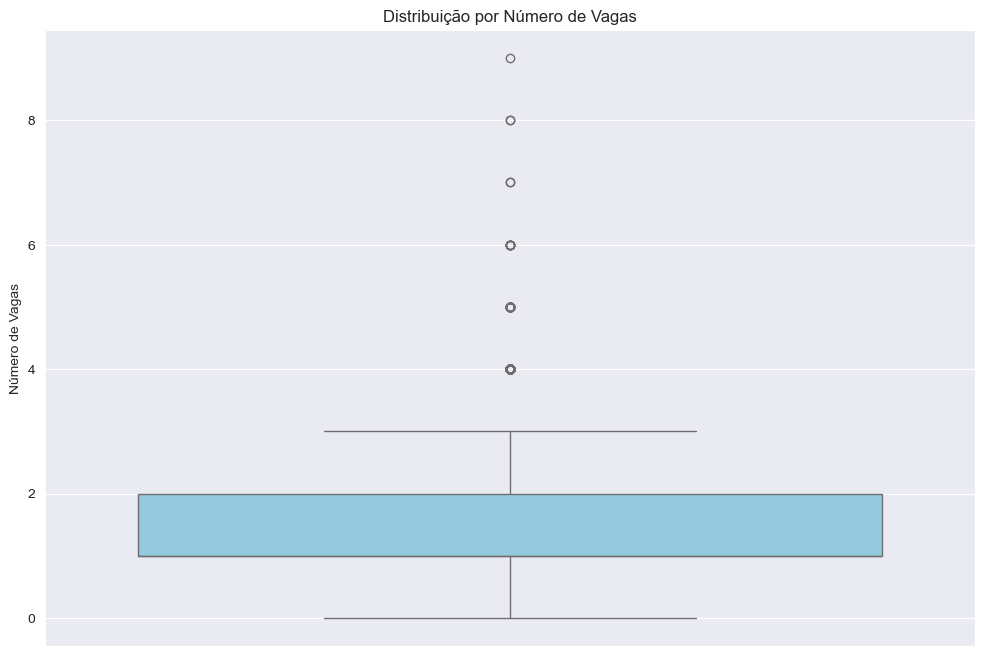

In [119]:
sns.set_style('darkgrid')

#boxplot para a coluna N_Vagas
plt.figure(figsize=(12,8))
sns.boxplot(df,y='N_Vagas', color='skyblue')
plt.title('Distribuição por Número de Vagas')
plt.ylabel('Número de Vagas')
plt.show()

<p>É perceptível que há alguns outliers observando o boxplot, mas, pelo próprio <em>describe</em>, pude notar que a média está mais alta em todas as variáveis quando comparada à mediana. Vou optar por transformar esses dados pois creio que esses dados de apartamentos sejam reais referente a APs de luxo e não erros de digitação.</p>

In [120]:
df.columns

Index(['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos',
       'N_banheiros', 'N_Suites', 'N_Vagas'],
      dtype='object')

In [121]:
colunas_transformadas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']

for col in colunas_transformadas:
    df[f'{col}_log'] = np.log1p(df[col]) 

In [122]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000,7203.000000,7203.000000,7203.000000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176,7.715575,5.935956,4.340613
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993,0.681132,1.992531,0.513099
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000,6.175867,0.000000,3.433987
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000,7.208600,5.981414,3.970292
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000,7.601402,6.385194,4.219508
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000,8.071219,6.888572,4.615121
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000,10.126671,9.159152,6.781058


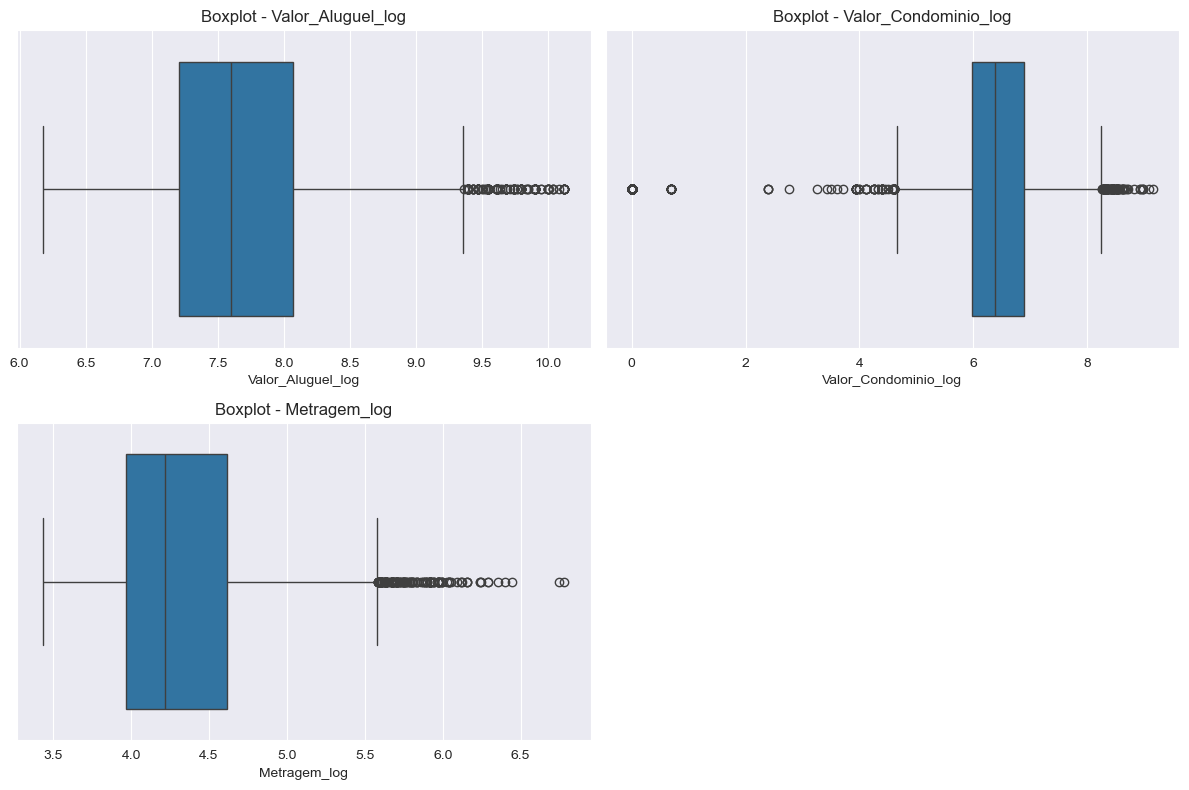

In [123]:
plt.figure(figsize=(12, 8))

for i, col in enumerate([f'{c}_log' for c in colunas_transformadas], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

<p>Optei por usar a transformação logarítmica, pois ela reduz o impacto dos outliers sem remover os dados dos apartamentos de luxo. Além disso, a escala dos valores mais altos foi suavizada, impactando menos a média e outras métricas.</p>

## C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [124]:
media_valoraluguel_por_metragem = df.groupby('Metragem_log')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_metragem, x='Metragem_log', y='Valor_Aluguel_log',
              title='Relação entre Metragem e Valor do Aluguel',
              labels={'Metragem_log': 'Metragem (Log)', 'Valor_Aluguel_log': 'Valor Aluguel (Log)'})

fig.show()

In [125]:
media_valoraluguel_por_quartos = df.groupby('N_Quartos')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_quartos, x='N_Quartos', y='Valor_Aluguel_log',
              title='Relação entre Número de Quartos e Valor do Aluguel',
              labels={'N_Quartos': 'Nº de Quartos', 'Valor_Aluguel_log': 'Valor do Aluguel (Log)'})

fig.show()

In [126]:
media_valoraluguel_por_banheiro = df.groupby('N_banheiros')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_banheiro, x='N_banheiros', y='Valor_Aluguel_log',
              title='Relação entre Número de Banheiros e Valor do Aluguel',
              labels={'N_banheiros': 'Nº de Banheiros', 'Valor_Aluguel_log': 'Valor do Aluguel (Log)'})

fig.show()

In [127]:
media_valoraluguel_por_suite = df.groupby('N_Suites')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_suite, x='N_Suites', y='Valor_Aluguel_log',
              title='Relação entre Número de Suites e Valor do Aluguel',
              labels={'N_Suites': 'Nº de Suites', 'Valor_Aluguel_log': 'Valor do Aluguel (Log)'})

fig.show()

In [128]:
media_valoraluguel_por_vagas = df.groupby('N_Vagas')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_vagas, x='N_Vagas', y='Valor_Aluguel_log',
              title='Relação entre Número de Vagas e Valor do Aluguel',
              labels={'N_Vagas': 'Nº de Vagas', 'Valor_Aluguel_log': 'Valor do Aluguel (Log)'})

fig.show()

In [129]:
media_valoraluguel_por_condominio = df.groupby('Valor_Condominio_log')['Valor_Aluguel_log'].mean().reset_index()

fig = px.line(media_valoraluguel_por_condominio, x='Valor_Condominio_log', y='Valor_Aluguel_log',
              title='Relação entre Valor do Condomínio e Valor do Aluguel',
              labels={'Valor_Condominio_log': 'Valor do Condomínio (Log)', 'Valor_Aluguel_log': 'Valor do Aluguel (Log)'})

fig.show()

<p>Pelos gráficos plotados durante a análise bivariada, pude notar que algumas variáveis, quando comparadas ao valor do aluguel, quase formam uma reta perfeita, como as variáveis número de banheiros, número de suítes e número de vagas. Além disso, a metragem e o valor do condomínio também aparentam indicar uma boa relação.</p>

# 3 - Realize a terceira etapa de pré processamento dos dados.


## A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

In [130]:
df.columns

Index(['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos',
       'N_banheiros', 'N_Suites', 'N_Vagas', 'Valor_Aluguel_log',
       'Valor_Condominio_log', 'Metragem_log'],
      dtype='object')

In [131]:
df_log = df[['N_Quartos','N_banheiros', 'N_Suites', 'N_Vagas', 'Valor_Aluguel_log',
       'Valor_Condominio_log', 'Metragem_log']]

df_log

,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
0,2,2,1,1,6.175867,5.690359,3.891820
1,1,2,1,1,6.216606,0.000000,3.931826
2,1,2,1,1,6.216606,0.000000,3.713572
3,1,2,1,0,6.216606,3.610918,3.828641
4,1,1,0,0,6.216606,0.000000,3.433987
...,...,...,...,...,...,...,...
7198,4,5,4,6,10.126671,8.922792,6.442540
7199,4,2,1,0,10.126671,8.434029,5.899897
7200,3,4,3,7,10.126671,8.216358,5.587249
7201,4,5,4,8,10.126671,8.699681,6.398595


#### Tabela

In [132]:
df_log.corr()

,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
N_Quartos,1.000000,0.553807,0.540887,0.591224,0.440619,0.243020,0.762561
N_banheiros,0.553807,1.000000,0.920149,0.694983,0.610683,0.232967,0.687109
N_Suites,0.540887,0.920149,1.000000,0.712054,0.605065,0.223651,0.674969
N_Vagas,0.591224,0.694983,0.712054,1.000000,0.657702,0.323660,0.733473
Valor_Aluguel_log,0.440619,0.610683,0.605065,0.657702,1.000000,0.351782,0.726896
Valor_Condominio_log,0.243020,0.232967,0.223651,0.323660,0.351782,1.000000,0.355484
Metragem_log,0.762561,0.687109,0.674969,0.733473,0.726896,0.355484,1.000000


#### Matriz de Correlação

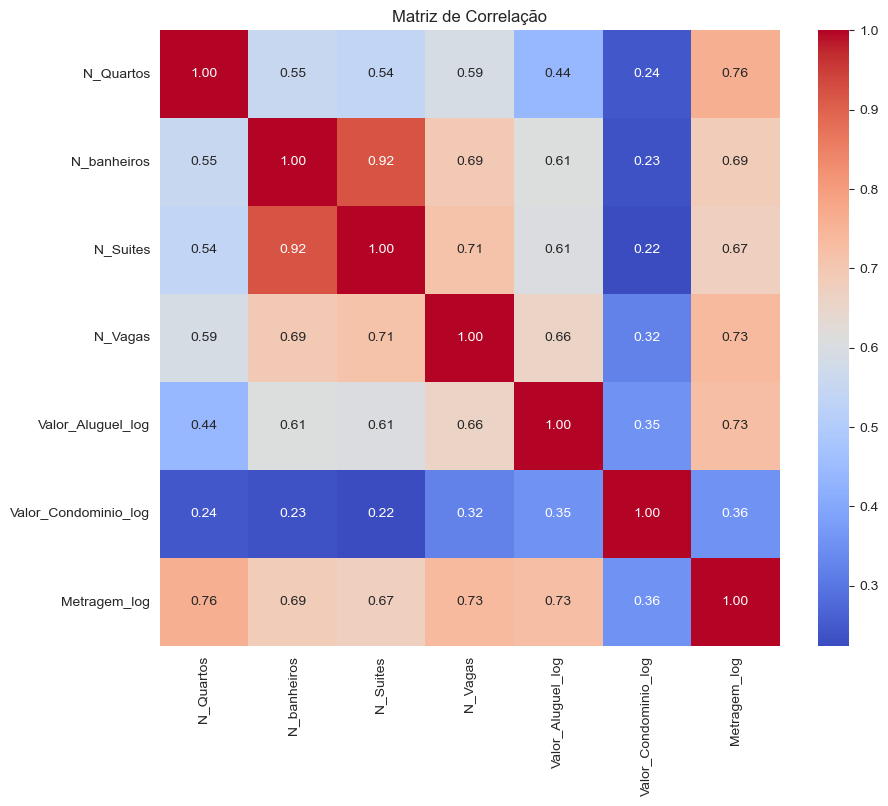

In [133]:
correlation_matrix = df_log.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

<p>As variaveis mais "fortes" para utilizarmos no modelo são Metragem,N_Vagas,N_Suites e N_banheiros</p>


## B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [134]:
X = df_log.drop('Valor_Aluguel_log', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df_log['Valor_Aluguel_log'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (5762, 6)
Tamanho de X_test: (1441, 6)
Tamanho de y_train: (5762,)
Tamanho de y_test: (1441,)


# 3 - Treine um modelo de regressão Linear simples

## A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [137]:
X = X_train[['Metragem_log']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [138]:
regressao_valor_aluguel = LinearRegression()

regressao_valor_aluguel.fit(X,y)

LinearRegression()

## B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [139]:
regressao_valor_aluguel.intercept_

3.582237323876117

In [140]:
regressao_valor_aluguel.coef_

array([0.95213732])

<p>Nossa equação seria:  log(Valor_Aluguel)=3.5⋅(log(Metragem))+0.95</p>
<p>Como usei o logaritimo preciso transformar os dados de volta então seria: Valor_Aluguel=exp(3.5⋅log(Metragem+1)+0.95)−1</p>

## c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [141]:
# Calculando o R² para os dados de treinamento
r2_treino = regressao_valor_aluguel.score(X, y)  # X_train e y_train
print(f"R² (treinamento): {r2_treino:.2f}")

R² (treinamento): 0.52


In [142]:
# Fazendo as previsões no conjunto de treinamento
y_pred_treino = regressao_valor_aluguel.predict(X)

# Calculando o R² para os dados de treinamento
r2_treino = r2_score(y, y_pred_treino)
print(f"R² (treinamento): {r2_treino:.2f}")

R² (treinamento): 0.52


Se formos levar na prática:
- **R² ≥ 0.7** -> Bom
- **0.5 ≤ R² < 0.7** -> Médio
- **R² < 0.5** -> Ruim

Um coeficiente de determinação R² = 0.52 indica que aproximadamente 52% da variação nos valores de aluguel pode ser explicada pela metragem.

Embora a metragem seja uma variável muito relevante, o modelo só consegue explicar metade da variabilidade nos valores de aluguel, o que indica que há outros fatores influenciando o preço do aluguel.
Ao meu ver isso pode ser considerado um desempenho ruim, dependendo do contexto, pois o modelo tem baixa capacidade de previsão/generalização.

## D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

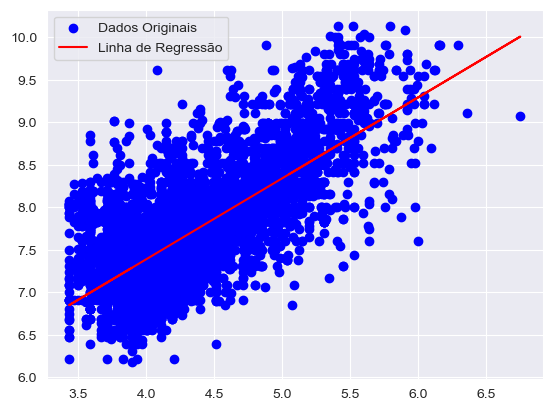

In [143]:
# Plotar os dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X, regressao_valor_aluguel.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

Como esperado após a avaliação do R² podemos notar que os dados estão bem dispersão em relação a linha de regressão.

## E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [144]:
X_test = X_test[['Metragem_log']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [145]:
# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5673918032003159


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

## F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Nos Dados de Teste R² = 0.56 nos explica que aproximadamente 56% da variação dos valores de aluguel pode ser explicada pelo modelo com base na variavel metragem, esse valor não é ruim e nem bom, ele é médio, em outras palavras o modelo é razoavel para prever alugueis nos dados que ele não viu durante o treinamento.

Nos Dados de Treinamento R² = 0.52 nos explica que aproximadamente 52% a variação dos valores de aluguel pode ser explicada pelo modelo com base na variavel metragem, esse valor não é ruim e nem bom, ele é médio,é praticamente o mesmo que obtivemos nos dados de teste, então o modelo não está superajustado(overfitting) mas sim tentando aprender padrões.


Notei que o modelo não tem um desempenho perfeito, mas o fato de o R² ser similar nos dados de treinamento e teste mostra que ele está generalizando de maneira decente. e não há indícios de superajuste ou subajuste, mas acredito que ainda podemos melhorar o modelo, talvez ajustando ou incluindo mais variáveis explicativas.

# 4 - Aplicação do modelo de regressão linear multipla!

## A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [146]:
X = df_log.drop('Valor_Aluguel_log', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df_log['Valor_Aluguel_log'] #Separando Y (Apenas variavel valor_aluguel)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (5762, 6)
Tamanho de X_test: (1441, 6)
Tamanho de y_train: (5762,)
Tamanho de y_test: (1441,)


In [149]:
X_train = X_train[['N_Quartos','N_banheiros', 'N_Suites', 'N_Vagas',
       'Valor_Condominio_log', 'Metragem_log']]  # Variável independente (características)
y_train = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

## B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [150]:
regressao_multipla_valor_aluguel = LinearRegression()

regressao_multipla_valor_aluguel.fit(X_train,y_train)

LinearRegression()

In [151]:
regressao_multipla_valor_aluguel.intercept_

3.93730416711052

In [152]:
regressao_multipla_valor_aluguel.coef_

array([-0.24398397,  0.07426712,  0.04351003,  0.16005778,  0.02980707,
        0.85936311])

## C) Traga o valor do R quadrado e avalie o valor encontrado.

In [156]:
# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_multipla_valor_aluguel.score(X_train,y_train)

print("Coeficiente de Determinação (R²) nos Dados de Treino:", r2)

Coeficiente de Determinação (R²) nos Dados de Treino: 0.6049616281821104


Se formos levar na prática:
- **R² ≥ 0.7** -> Bom
- **0.5 ≤ R² < 0.7** -> Médio
- **R² < 0.5** -> Ruim

Comparado ao modelo de regressão simples, houve uma melhora. Um coeficiente de determinação R² = 0.6 indica que aproximadamente 60% da variação nos valores de aluguel podem ser explicados pelas variáveis que utilizamos no modelo.

Ainda assim, o modelo não está "perfeito" ao meu ver. Talvez, realizando ajustes nos hiperparâmetros, poderíamos alcançar 70% ou mais, o que seria considerado um bom desempenho novamente ao meu ver.

Entretanto, com o desempenho atual, podemos considerar o modelo moderado, dependendo do contexto. Ele tem uma capacidade razoável de generalização, mas ainda há espaço para melhorias.

## D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [154]:
X_test = X_test[['N_Quartos','N_banheiros', 'N_Suites', 'N_Vagas',
       'Valor_Condominio_log', 'Metragem_log']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [155]:
# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_multipla_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6440889238816105


## E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Comparando o modelo de regressão simples, onde R² = 0.56, com o modelo de regressão múltipla, onde R² = 0.64, podemos notar uma melhora de 8% na capacidade de previsão. O modelo que, obviamente, se sai melhor é o de regressão múltipla, pois apresenta um R² maior.

Acredito que isso acontece porque o valor do aluguel, que é a variável que estamos tentando prever, é impactado por várias outras variáveis da base, e não apenas pela metragem, que foi a única variável utilizada no modelo de regressão simples. Em outras palavras, o valor do aluguel não pode, e nem deve, ser medido somente pela metragem, mas também devemos considerar outros aspectos.

Se estivéssemos em uma situação real, eu diria que seria necessário incluir ainda mais dados, como cidade, bairro, vizinhança e até mesmo fatores como altitude. Isso parece lógico, já que até mesmo quando escolhemos um lugar para morar, levamos essas métricas em consideração para encontrar o melhor custo-benefício. Dessa forma, faz sentido aplicar a mesma lógica ao nosso modelo.